# Main system for specific systems (Recon system, DoS system 2 models, Mirai system, Auth system, Web system, Web and Dict system)

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\Main_system_for_specific_systems\\"
file_path = '.\Files\\Main_system_for_specific_systems\\'

## Define variables

In [2]:
performance_path = 'performance.csv'
model_path_binary = '.\\Main_system_for_specific_systems\\Binary\\'
model_path_8_classes = '.\\Main_system_for_specific_systems\\8_classes\\'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
X_columns = X_columns[:-2]
print(len(X_columns))
y_column = 'label'
w_column = 'Binary'
z_column = '8_classes'

95
46


## Binary Classification (Attack or Normal)

### Preprocessing data

#### Dictionnaries

In [2]:
dict_2classes = {}
dict_2classes['DDoS-RSTFINFlood'] = 'Attack'
dict_2classes['DDoS-PSHACK_Flood'] = 'Attack'
dict_2classes['DDoS-SYN_Flood'] = 'Attack'
dict_2classes['DDoS-UDP_Flood'] = 'Attack'
dict_2classes['DDoS-TCP_Flood'] = 'Attack'
dict_2classes['DDoS-ICMP_Flood'] = 'Attack'
dict_2classes['DDoS-SynonymousIP_Flood'] = 'Attack'
dict_2classes['DDoS-ACK_Fragmentation'] = 'Attack'
dict_2classes['DDoS-UDP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-ICMP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-SlowLoris'] = 'Attack'
dict_2classes['DDoS-HTTP_Flood'] = 'Attack'

dict_2classes['DoS-UDP_Flood'] = 'Attack'
dict_2classes['DoS-SYN_Flood'] = 'Attack'
dict_2classes['DoS-TCP_Flood'] = 'Attack'
dict_2classes['DoS-HTTP_Flood'] = 'Attack'


dict_2classes['Mirai-greeth_flood'] = 'Attack'
dict_2classes['Mirai-greip_flood'] = 'Attack'
dict_2classes['Mirai-udpplain'] = 'Attack'

dict_2classes['Recon-PingSweep'] = 'Attack'
dict_2classes['Recon-OSScan'] = 'Attack'
dict_2classes['Recon-PortScan'] = 'Attack'
dict_2classes['VulnerabilityScan'] = 'Attack'
dict_2classes['Recon-HostDiscovery'] = 'Attack'

dict_2classes['DNS_Spoofing'] = 'Attack'
dict_2classes['MITM-ArpSpoofing'] = 'Attack'

dict_2classes['BenignTraffic'] = 'Benign'

dict_2classes['BrowserHijacking'] = 'Attack'
dict_2classes['Backdoor_Malware'] = 'Attack'
dict_2classes['XSS'] = 'Attack'
dict_2classes['Uploading_Attack'] = 'Attack'
dict_2classes['SqlInjection'] = 'Attack'
dict_2classes['CommandInjection'] = 'Attack'

dict_2classes['DictionaryBruteForce'] = 'Attack'

In [3]:
dict_8classes = {}
dict_8classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_8classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_8classes['DDoS-SYN_Flood'] = 'DDoS'
dict_8classes['DDoS-UDP_Flood'] = 'DDoS'
dict_8classes['DDoS-TCP_Flood'] = 'DDoS'
dict_8classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_8classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_8classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-SlowLoris'] = 'DDoS'
dict_8classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_8classes['DoS-UDP_Flood'] = 'DoS'
dict_8classes['DoS-SYN_Flood'] = 'DoS'
dict_8classes['DoS-TCP_Flood'] = 'DoS'
dict_8classes['DoS-HTTP_Flood'] = 'DoS'


dict_8classes['Mirai-greeth_flood'] = 'Mirai'
dict_8classes['Mirai-greip_flood'] = 'Mirai'
dict_8classes['Mirai-udpplain'] = 'Mirai'

dict_8classes['Recon-PingSweep'] = 'Recon'
dict_8classes['Recon-OSScan'] = 'Recon'
dict_8classes['Recon-PortScan'] = 'Recon'
dict_8classes['VulnerabilityScan'] = 'Recon'
dict_8classes['Recon-HostDiscovery'] = 'Recon'

dict_8classes['DNS_Spoofing'] = 'Spoofing'
dict_8classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_8classes['BenignTraffic'] = 'Benign'

dict_8classes['BrowserHijacking'] = 'Web'
dict_8classes['Backdoor_Malware'] = 'Web'
dict_8classes['XSS'] = 'Web'
dict_8classes['Uploading_Attack'] = 'Web'
dict_8classes['SqlInjection'] = 'Web'
dict_8classes['CommandInjection'] = 'Web'


dict_8classes['DictionaryBruteForce'] = 'BruteForce'

#### Import datasets

In [4]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


#### Add "Binary" and "8_classes" targets

In [5]:
# Binary
train_sets.extend(test_sets)

refactor_dataframe(train_sets, dict_2classes, file_path, y_column)

# 8 classes
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
temp_df = build_sets.copy()
temp_df.extend(after_build_sets)

add_column_by_another_to_datasets(file_path, temp_df, '8_classes', y_column, dict_8classes)

100%|██████████| 95/95 [16:22<00:00, 10.34s/it]


#### Basic scaler

In [8]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets, X_columns, file_path)

.\Main_system_for_specific_systems\


100%|██████████| 61/61 [01:21<00:00,  1.33s/it]


### Select features by importance

In [3]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_binary+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_binary+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_binary+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_binary+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_binary+'model_LIGHT.joblib')
    },
    {
        "Name": "GBoost",
        "Model": joblib.load(model_path_binary+'model_GBoost.joblib')
    },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_binary+'model_Adaboost.joblib')
    },
]

100%|██████████| 7/7 [00:00<00:00, 366.28it/s]


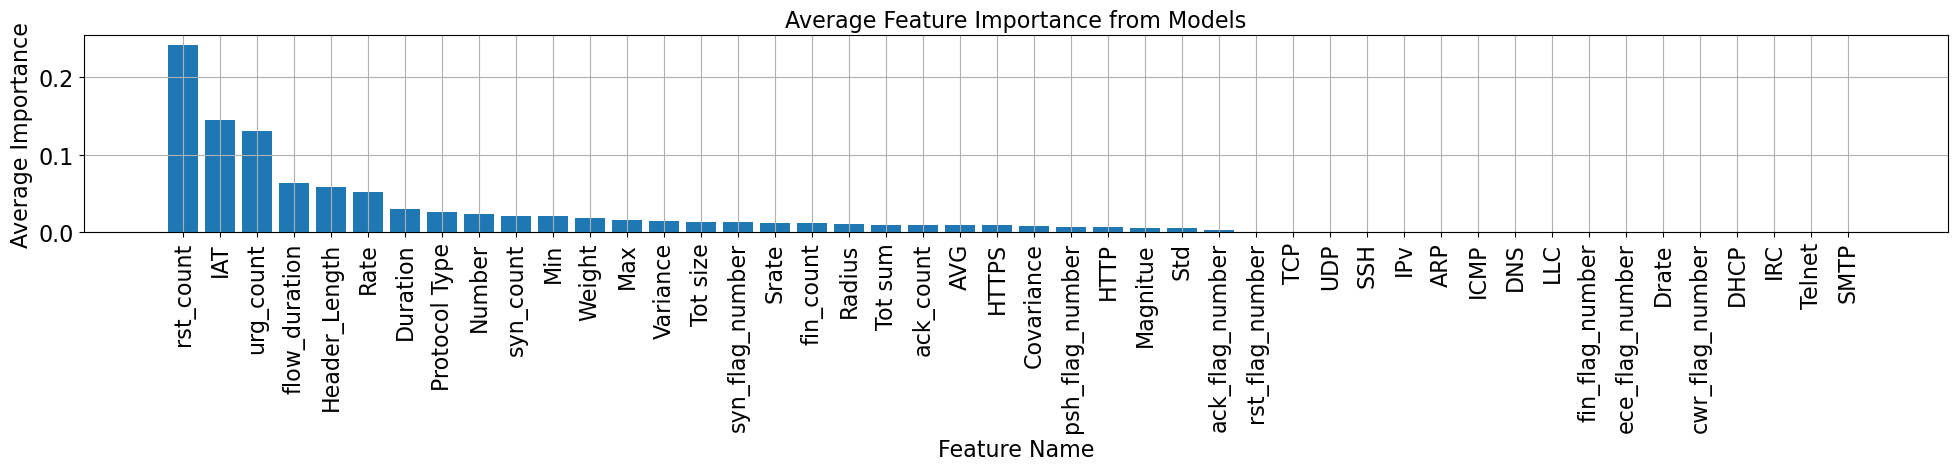

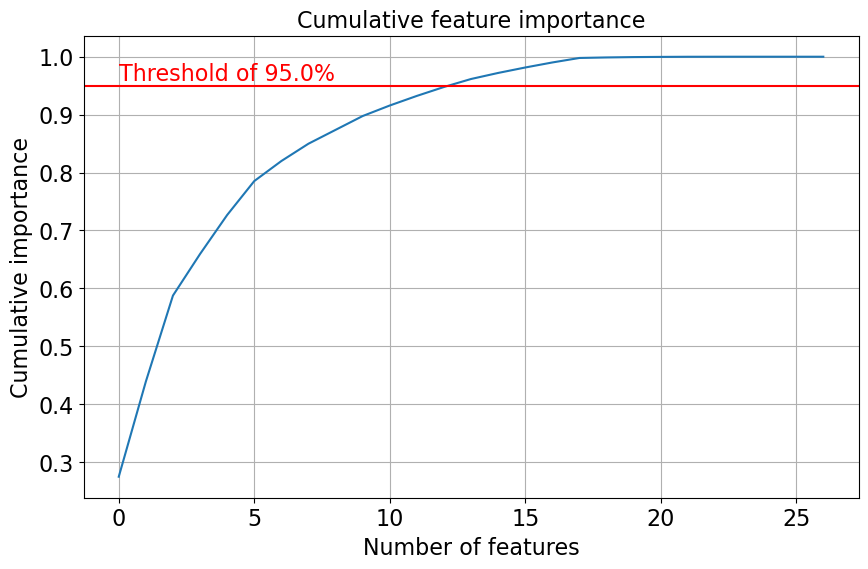

['rst_count', 'IAT', 'urg_count', 'flow_duration', 'Header_Length', 'Rate', 'Duration', 'Protocol Type', 'syn_count', 'Min', 'Max', 'Variance', 'Tot size']


100%|██████████| 61/61 [01:21<00:00,  1.33s/it]


In [4]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_binary, all_features=True, figsize=(20, 8))
average_importance_df.to_csv(model_path_binary+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\Main_system_for_specific_systems\\Binary\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_binary+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(read_csv_file(train_sets[0], file_path)[X_columns], average_importance_df, threshold=threshold)
# print(features_with_threshold_corr.head(features_with_threshold_corr.size))

# Select features with cumulative importance > 0.95 and correlation < 0.80
selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_path_binary, threshold_percentage=0.95)
pd.DataFrame(selected_X).to_csv(model_path_binary+'selected_X_columns.csv', index=False)
print(selected_X)

# Define and fit scaler
scaler = MinMaxScaler()
for train_set in tqdm(train_sets):
    scaler.fit(read_csv_file(train_set, file_path)[selected_X])

### Build simple models

In [5]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42),
        "search_spaces" : {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 100, 1000],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2', None],
            'max_leaf_nodes': [None, 10, 100, 1000],
            'random_state': [42],
        }
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

#### Building simple models with selection of features

100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


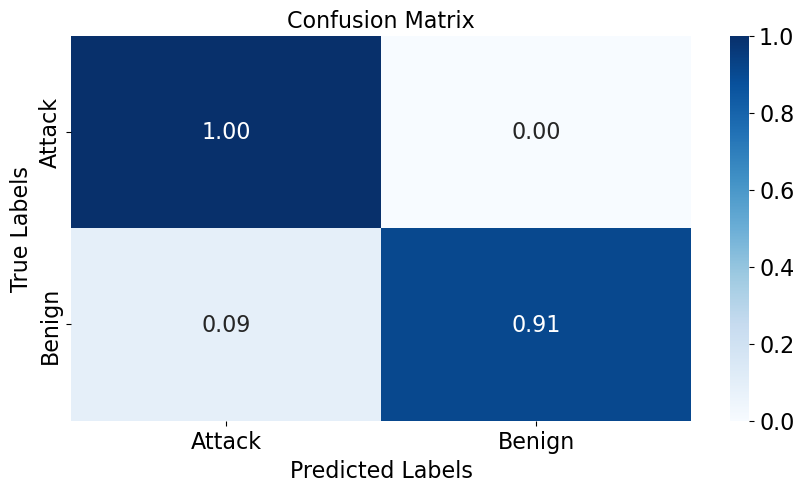

100%|██████████| 1/1 [11:04<00:00, 664.03s/it]


['.\\Main_system_for_specific_systems\\Binary\\encoder.joblib']

In [6]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))

# Search best hyperparameters
search_best_hyperparameters = False

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (10, 5)
saveConfusionMatrix = False
for model in tqdm(simpleModelsDef):
    # Search best hyperparameters
    if search_best_hyperparameters:
        model['Model'] = bayesian_optimization(model['Name'], model['Model'], model['search_spaces'], file_path, train_sets, selected_X, w_column, scaler, encoder, n_iter=10, cv=3)

    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_'+model['Name'], train_sets, test_sets, file_path, performance, model_path_binary+'SF_', X_columns=selected_X, y_column=w_column, encoder=encoder, scaler=scaler, \
                                                     confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_binary+'SF_'+model['Name'], figsize=figsizeConfusionMatrix)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

#### Building simple models without selection of features

100%|██████████| 2/2 [00:02<00:00,  1.08s/it]


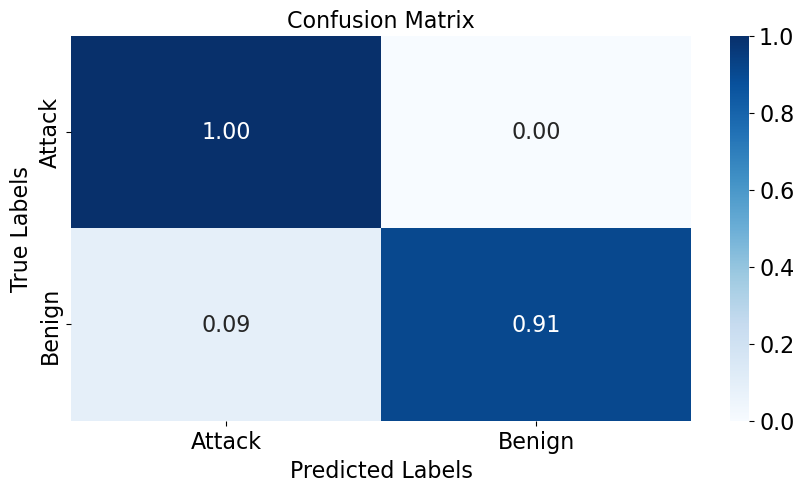

100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


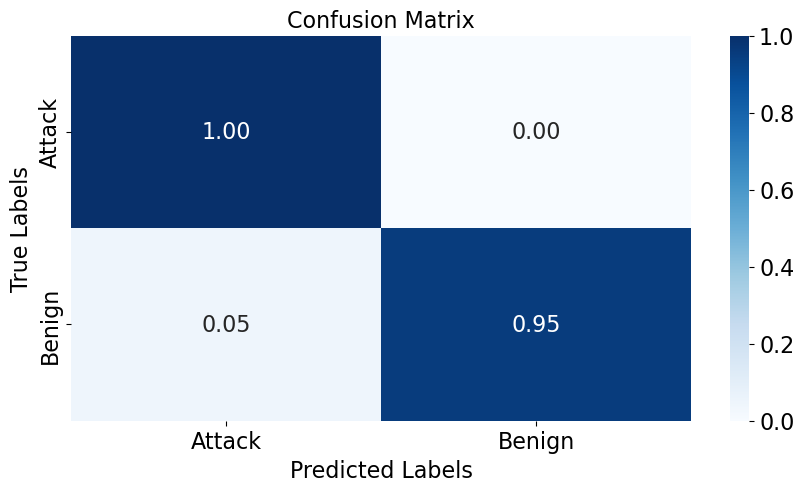

100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


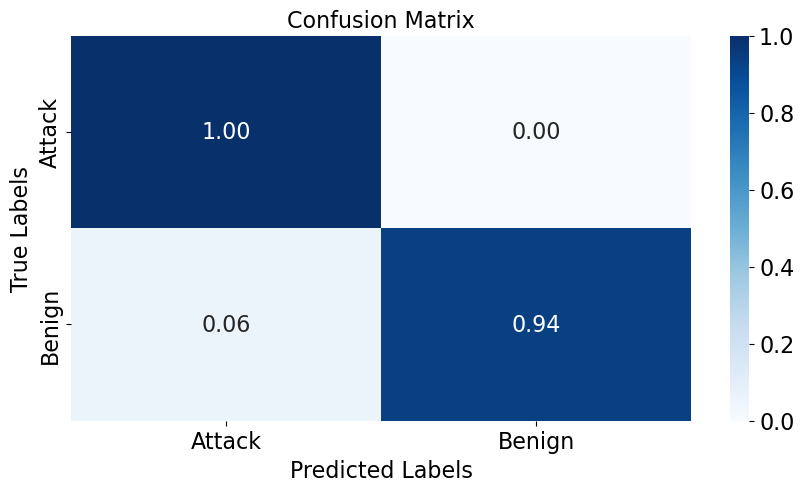

100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


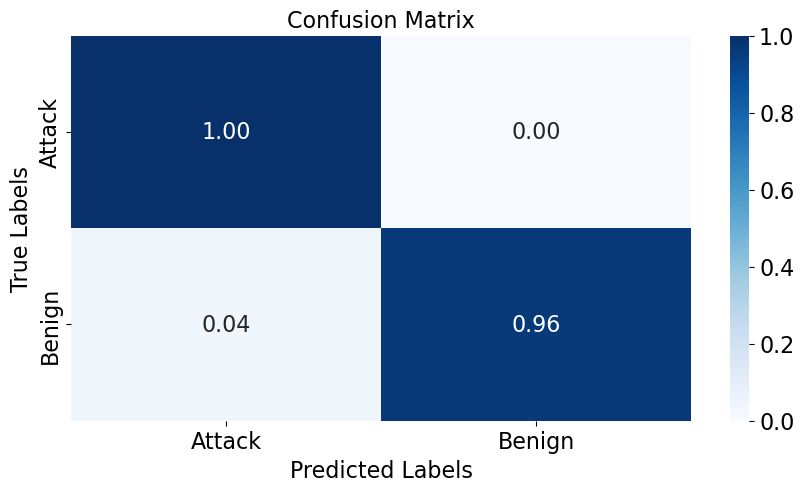

100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


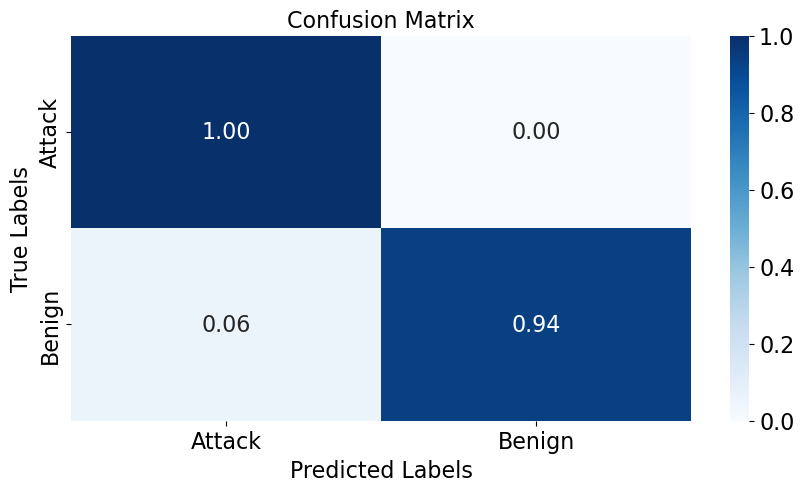

 56%|█████▌    | 5/9 [1:57:37<1:53:26, 1701.75s/it]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 2/2 [00:02<00:00,  1.13s/it]


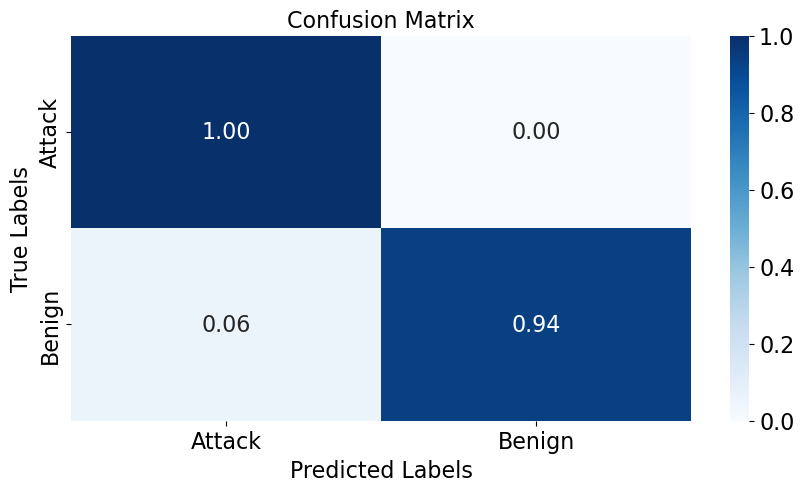

100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


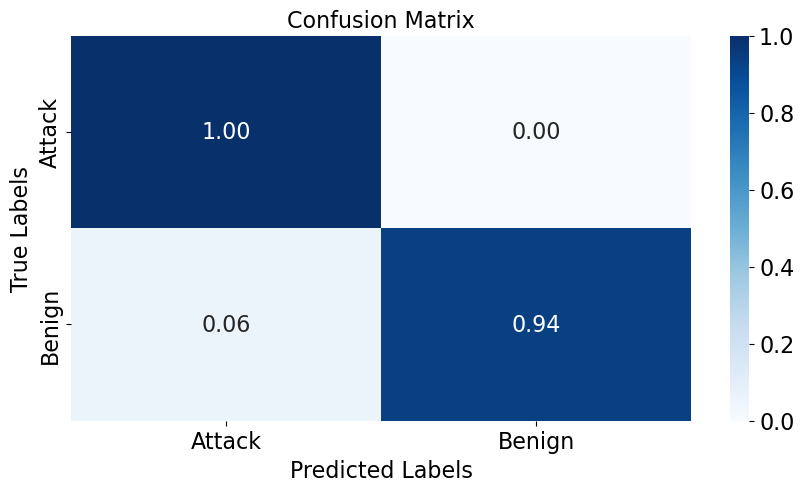

100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


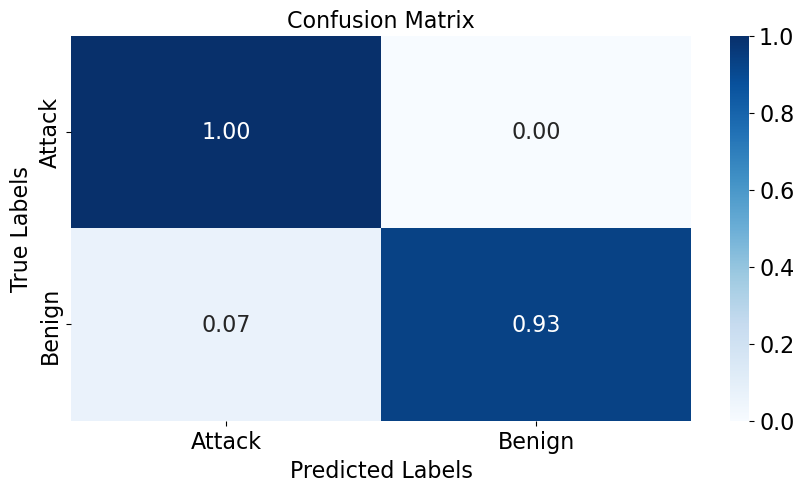

100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


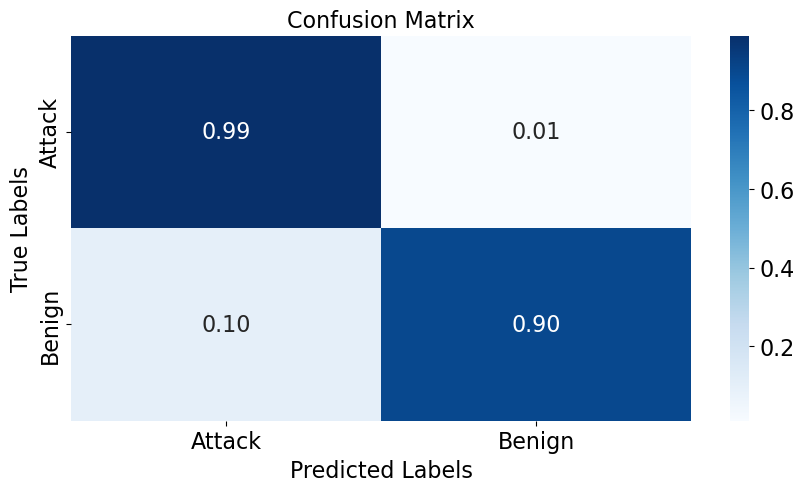

100%|██████████| 9/9 [7:27:14<00:00, 2981.65s/it]


['.\\Main_system_for_specific_systems\\Binary\\encoder.joblib']

In [12]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (10, 5)
saveConfusionMatrix = False
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary, X_columns=X_columns , y_column=w_column, encoder=encoder, scaler=scaler, \
                                                     confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_binary + model['Name'], figsize=figsizeConfusionMatrix)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

joblib.dump(encoder, model_path_binary+'encoder.joblib')

### Performance

In [8]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(18).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [9]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
3,XGB,0.999253,0.997393,0.986655,0.991963,0.997186,0.976613,0.963183,0.969797,0.001757,0.001058,14038,8451,7990787
10,SF_RF,1.000000,0.999993,0.999997,0.999995,0.997137,0.970644,0.967245,0.968938,0.001519,0.001344,12141,10740,7990787
1,RF,1.000000,0.999995,0.999998,0.999996,0.997116,0.972537,0.965221,0.968849,0.001631,0.001252,13036,10007,7990787
12,SF_XGB,0.999152,0.996554,0.985344,0.990882,0.997091,0.975258,0.962446,0.968760,0.001789,0.001121,14292,8954,7990787
11,SF_ET,1.000000,0.999997,1.000000,0.999999,0.996759,0.970900,0.959534,0.965144,0.001919,0.001322,15332,10567,7990787
6,GBoost,0.996621,0.968858,0.958541,0.963639,0.996412,0.966728,0.956170,0.961386,0.002073,0.001515,16564,12105,7990787
2,ET,1.000000,0.999997,1.000000,0.999999,0.996360,0.971166,0.951688,0.961210,0.002340,0.001300,18698,10386,7990787
15,SF_GBoost,0.996566,0.967921,0.958226,0.963020,0.996351,0.966040,0.955534,0.960724,0.002103,0.001547,16801,12358,7990787
4,Cat,0.999620,0.999042,0.992777,0.995889,0.996047,0.967383,0.948705,0.957843,0.002478,0.001474,19804,11781,7990787
0,DT,1.000000,0.999995,1.000000,0.999997,0.995904,0.954803,0.955897,0.955349,0.002019,0.002077,16135,16597,7990787
